<h1> From README </h1>

<p> 
SCADA data of De Watergroep

Disclaimer
The data are made available under the NDA of the AQUA project (Eureka AI grant). These data cannot be shared with other parties, nor used for other purposes than the tasks outlined in the AQUA project. The data should be discarded at the end of the project.
    
The data remain the property of De Watergroep. Any publication or dissemination with respect to the data or results obtained from the data processing should be made in close collaboration with De Watergroep, or with the written permission of De Watergroep.
Outline
    
The SCADA data come from the operational monitoring of the water production centers in Kluizen and Eeklo (WPC Kluizen and WPC Eeklo). These contain the water quality data that are measured with inline sensors. The tags are indicated in the figures that are supplied with the data. 
    
The data from 4 water towers (WT Maldegem, WT Eeklo 1, WT Eeklo 2 and WT Sleidinge) are also included. These data only include the pressure in the network at the intake of the water tower, the water height in the tower’s reservoir, and the in- and outflow. WT Eeklo 1 is no longer operational, and the water simply passes through. 
The data passed a sanity check, but are not validated by process engineers. Outliers, peculiar trends or other specific observations can be reported to Pieter Jan Haest (contact details given below).
    
The location of the water production centers and the water towers is supplied in the GIS files.

Contact:
    
Pieter Jan Haest
    
Projectmanager Innovation – Industry 4.0
    
Pieterjan.haest@dewatergroep.be
 </p>

In [31]:
import os
import folium 
import glob

import pandas as pd
import geopandas as gpd

In [12]:
DATAPATH = os.path.join(".." , "..", "shared-aquaai", "watergroep-feb-2022")

In [24]:
class CollaborateManageFiles():
    
    @staticmethod
    def get_items_in_folder(PATH = os.getcwd(),  recursive = False, ext_ = None ):
        """Lists files in folder by extension"""
        if recursive:
            result = [y for x in os.walk(PATH) for y in glob.glob(os.path.join(x[0], f'*{ext_ }'))]
            result = [i.replace("\\","//") for i in result]
        else:
            result = [f for f in glob.glob(PATH+f"/*{ext_ }")]
            result = [i.replace("\\","//") for i in result]
            #pass
        return result 

In [48]:
# look at files and directories in folder 
CollaborateManageFiles.get_items_in_folder(PATH = DATAPATH, ext_ = "", recursive= False)

['../../shared-aquaai/watergroep-feb-2022/WPCEeklo.png',
 '../../shared-aquaai/watergroep-feb-2022/WPCKluizen.png',
 '../../shared-aquaai/watergroep-feb-2022/README.docx',
 '../../shared-aquaai/watergroep-feb-2022/GIS',
 '../../shared-aquaai/watergroep-feb-2022/20220331_dwgscada.csv']

In [ ]:
#  View PNGs

<h1> WPCEeklo </h1> 

![title](../../shared-aquaai/watergroep-feb-2022/WPCEeklo.png)

<h1> WPCKluizen </h1> 

![title](../../shared-aquaai/watergroep-feb-2022/WPCKluizen.png)

In [29]:
# look at csv
CollaborateManageFiles.get_files_in_folder(PATH = DATAPATH, ext_ = "csv", recursive= False)

['../../shared-aquaai/watergroep-feb-2022/20220331_dwgscada.csv']

In [32]:
df_raw = pd.read_csv('../../shared-aquaai/watergroep-feb-2022/20220331_dwgscada.csv')
df_raw.head()

Id              UtcTimestamp  \
0  125660438  2022-03-18T17:55:00.603Z   
1  125661700  2022-03-18T18:00:00.630Z   
2  125661727  2022-03-18T18:00:00.630Z   
3  125662988  2022-03-18T18:05:00.663Z   
4  125664222  2022-03-18T18:10:00.693Z   

                                     Tagname     Value  Quality  YearMonthId  \
0                    ST101.PLC10.RES1_Chloor  0.862000      192       202203   
1                        ST101.PLC10.RES2_pH  7.717000      192       202203   
2  ST104OPCUA_BEH.PLC.Cl2A60545_TotaalChloor  0.097477      192       202203   
3                       ST101.PLC9.RES2_Peil  4.341000      192       202203   
4                    ST101.PLC10.RES1_Chloor  0.871000      192       202203   

   ETLRunId  
0      4259  
1      4259  
2      4259  
3      4259  
4      4259

In [34]:
df = df_raw.copy()
df

Id              UtcTimestamp  \
0       125660438  2022-03-18T17:55:00.603Z   
1       125661700  2022-03-18T18:00:00.630Z   
2       125661727  2022-03-18T18:00:00.630Z   
3       125662988  2022-03-18T18:05:00.663Z   
4       125664222  2022-03-18T18:10:00.693Z   
...           ...                       ...   
983192  130050103  2022-03-30T09:40:00.557Z   
983193  130050124  2022-03-30T09:40:00.557Z   
983194  130050130  2022-03-30T09:40:00.557Z   
983195  130051175  2022-03-30T09:45:00.597Z   
983196  130051198  2022-03-30T09:45:00.597Z   

                                          Tagname       Value  Quality  \
0                         ST101.PLC10.RES1_Chloor    0.862000      192   
1                             ST101.PLC10.RES2_pH    7.717000      192   
2       ST104OPCUA_BEH.PLC.Cl2A60545_TotaalChloor    0.097477      192   
3                            ST101.PLC9.RES2_Peil    4.341000      192   
4                         ST101.PLC10.RES1_Chloor    0.871000      192   
...                                           ...         ...      ...   
983192               ST102OPCUA.PLC.FE0210_Debiet   67.252600      192   
983193                 ST105OPCUA.PLC.PE0420_Druk    3.096065      192   
983194                 ST106OPCUA.PLC.PE0910_Druk    4.585865      192   
983195           ST104OPCUA_BEH.PLC.LET60303_Peil    3.015625      192   
983196               ST108OPCUA.PLC.FE0210_Debiet  121.144390      192   

        YearMonthId  ETLRunId  
0            202203      4259  
1            202203      4259  
2            202203      4259  
3            202203      4259  
4            202203      4259  
...             ...       ...  
983192       202203      4377  
983193       202203      4377  
983194       202203      4377  
983195       202203      4377  
983196       202203      4377  

[983197 rows x 7 columns]

In [47]:
#  split the Tagname column 
df["tag_name_split"] = df["Tagname"].str.split(".")
# check that the split yields even number of splits
set([len(i) for i in df["tag_name_split"]])

{3}

In [46]:
# split up the Tagname columns
df[['unknown1', 'unknown2', 'unknown3']] = df["Tagname"].str.split('.', n=2, expand=True)
df[['unknown3', 'unknown4']] = df["unknown3"].str.split('_', n=1, expand=True)
df

Id              UtcTimestamp  \
0       125660438  2022-03-18T17:55:00.603Z   
1       125661700  2022-03-18T18:00:00.630Z   
2       125661727  2022-03-18T18:00:00.630Z   
3       125662988  2022-03-18T18:05:00.663Z   
4       125664222  2022-03-18T18:10:00.693Z   
...           ...                       ...   
983192  130050103  2022-03-30T09:40:00.557Z   
983193  130050124  2022-03-30T09:40:00.557Z   
983194  130050130  2022-03-30T09:40:00.557Z   
983195  130051175  2022-03-30T09:45:00.597Z   
983196  130051198  2022-03-30T09:45:00.597Z   

                                          Tagname       Value  Quality  \
0                         ST101.PLC10.RES1_Chloor    0.862000      192   
1                             ST101.PLC10.RES2_pH    7.717000      192   
2       ST104OPCUA_BEH.PLC.Cl2A60545_TotaalChloor    0.097477      192   
3                            ST101.PLC9.RES2_Peil    4.341000      192   
4                         ST101.PLC10.RES1_Chloor    0.871000      192   
...                                           ...         ...      ...   
983192               ST102OPCUA.PLC.FE0210_Debiet   67.252600      192   
983193                 ST105OPCUA.PLC.PE0420_Druk    3.096065      192   
983194                 ST106OPCUA.PLC.PE0910_Druk    4.585865      192   
983195           ST104OPCUA_BEH.PLC.LET60303_Peil    3.015625      192   
983196               ST108OPCUA.PLC.FE0210_Debiet  121.144390      192   

        YearMonthId  ETLRunId                                 tag_name_split  \
0            202203      4259                    [ST101, PLC10, RES1_Chloor]   
1            202203      4259                        [ST101, PLC10, RES2_pH]   
2            202203      4259  [ST104OPCUA_BEH, PLC, Cl2A60545_TotaalChloor]   
3            202203      4259                       [ST101, PLC9, RES2_Peil]   
4            202203      4259                    [ST101, PLC10, RES1_Chloor]   
...             ...       ...                                            ...   
983192       202203      4377               [ST102OPCUA, PLC, FE0210_Debiet]   
983193       202203      4377                 [ST105OPCUA, PLC, PE0420_Druk]   
983194       202203      4377                 [ST106OPCUA, PLC, PE0910_Druk]   
983195       202203      4377           [ST104OPCUA_BEH, PLC, LET60303_Peil]   
983196       202203      4377               [ST108OPCUA, PLC, FE0210_Debiet]   

              unknown1 unknown2   unknown3      unknown4  
0                ST101    PLC10       RES1        Chloor  
1                ST101    PLC10       RES2            pH  
2       ST104OPCUA_BEH      PLC  Cl2A60545  TotaalChloor  
3                ST101     PLC9       RES2          Peil  
4                ST101    PLC10       RES1        Chloor  
...                ...      ...        ...           ...  
983192      ST102OPCUA      PLC     FE0210        Debiet  
983193      ST105OPCUA      PLC     PE0420          Druk  
983194      ST106OPCUA      PLC     PE0910          Druk  
983195  ST104OPCUA_BEH      PLC   LET60303          Peil  
983196      ST108OPCUA      PLC     FE0210        Debiet  

[983197 rows x 12 columns]

In [66]:
df['unknown1'].value_counts()

ST101             337727
ST104OPCUA_BEH    258330
ST106OPCUA        103336
ST105OPCUA        103332
ST102OPCUA        103168
ST108OPCUA         77304
Name: unknown1, dtype: int64

In [67]:
df['unknown2'].value_counts()

PLC      645470
PLC10    168863
PLC9      84432
PLC3      42216
PLC4      21109
PLC13     21107
Name: unknown2, dtype: int64

In [68]:
df['unknown3'].value_counts()

PE0910       103227
FE0210       103227
LVW           84431
LT0231        77459
FE0240        77394
RES2          63324
RES1          63324
Cl2A60545     51666
DEC           42216
NTUA60540     25833
PEIT60505     25833
LET60102      25833
FE10050       25833
PH60541       25833
PE0420        25833
FE60550       25833
LET60303      25833
ARX60546      25833
FE0815        21109
RES           21108
FE0810        21108
FLOT          21107
Name: unknown3, dtype: int64

In [69]:
df['unknown4'].value_counts()

Debiet          274504
Druk            176001
Peil            171341
pH               89156
Chloor           63324
NTU              42216
MDK_Peil         42215
TotaalChloor     25833
Turbiditeit      25833
VrijChloor       25833
Hardheid         25833
Debiet_Uit       21108
Name: unknown4, dtype: int64

In [51]:
CollaborateManageFiles.get_items_in_folder(PATH = DATAPATH+"/GIS", ext_ = ".shp", recursive= False)

['../../shared-aquaai/watergroep-feb-2022/GIS/network_meetjesland.shp',
 '../../shared-aquaai/watergroep-feb-2022/GIS/objects.shp']

In [52]:
class CollaborateGeoData():
    """A class for working with geo data"""
    
    @staticmethod
    def get_geodf(file_, crs = "epsg:4326" ):
        """Retunrns a geodataframe"""
        "EU_BASINS"
        gdf = gpd.read_file(file_, ) #crs={'init': 'epsg:4326'}
        crs_orginal = gdf.crs
        print(f"Original CRS: {crs_orginal}")            
        #if crs_orginal != crs:
        gdf = gpd.GeoDataFrame(gdf)
        if crs_orginal != crs:
            gdf = gdf.to_crs(crs)
            print(f"Source CRS changed from {crs_orginal} to {crs}")
        return gdf

In [58]:
CollaborateGeoData().get_geodf(file_ = '../../shared-aquaai/watergroep-feb-2022/GIS/network_meetjesland.shp', crs = "epsg:4326" )

Original CRS: epsg:31370
Source CRS changed from epsg:31370 to epsg:4326


G3E_FID NOMINALE_D  Diameter  \
0      480956        300       300   
1      480969        300       300   
2      480984        300       300   
3      480998        300       300   
4      481048        300       300   
...       ...        ...       ...   
1083  3009526        700       700   
1084  3009540        700       700   
1085  3009542         80        80   
1086  3009543         80        80   
1087  3009546        700       700   

                                               geometry  
0     LINESTRING (3.50806 51.21533, 3.50806 51.21533...  
1       LINESTRING (3.50806 51.21533, 3.50807 51.21534)  
2     LINESTRING (3.50807 51.21533, 3.50806 51.21533...  
3       LINESTRING (3.50808 51.21534, 3.50807 51.21533)  
4     LINESTRING (3.50556 51.21457, 3.50561 51.21459...  
...                                                 ...  
1083    LINESTRING (3.79935 51.19155, 3.79936 51.19155)  
1084  LINESTRING (3.79861 51.19222, 3.79863 51.19222...  
1085  LINESTRING (3.79859 51.19222, 3.79859 51.19223...  
1086    LINESTRING (3.79859 51.19223, 3.79858 51.19223)  
1087    LINESTRING (3.79859 51.19222, 3.79861 51.19222)  

[1088 rows x 4 columns]

Original CRS: epsg:31370
Source CRS changed from epsg:31370 to epsg:4326


<AxesSubplot:>

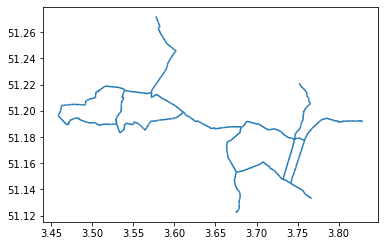

In [55]:
CollaborateGeoData().get_geodf(file_ = '../../shared-aquaai/watergroep-feb-2022/GIS/network_meetjesland.shp', crs = "epsg:4326" ).plot()

In [57]:
CollaborateGeoData().get_geodf(file_ = '../../shared-aquaai/watergroep-feb-2022/GIS/objects.shp', crs = "epsg:4326" )

Original CRS: epsg:31370
Source CRS changed from epsg:31370 to epsg:4326


FID_ATTR                            geometry
0   WT Assenede  POINT Z (3.75183 51.22085 0.00000)
1    WT Eeklo 2  POINT Z (3.53443 51.18327 0.00000)
2    WT Eeklo 1  POINT Z (3.57266 51.19225 0.00000)
3  WT Sleidinge  POINT Z (3.67479 51.12287 0.00000)
4   WT Maldegem  POINT Z (3.46883 51.18941 0.00000)
5    FM Zelzate  POINT Z (3.81948 51.19210 0.00000)
6   WPC Kluizen  POINT Z (3.71519 51.15725 0.00000)
7     WPC Eeklo  POINT Z (3.57895 51.21207 0.00000)

In [60]:
gdf_sites = CollaborateGeoData().get_geodf(file_ = '../../shared-aquaai/watergroep-feb-2022/GIS/objects.shp', crs = "epsg:4326" )

Original CRS: epsg:31370
Source CRS changed from epsg:31370 to epsg:4326


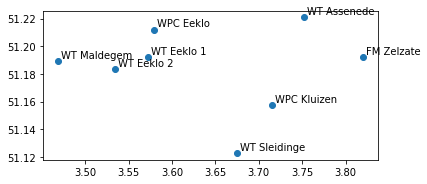

In [62]:
ax = gdf_sites.plot()

for x, y, label in zip(gdf_sites.geometry.x, gdf_sites.geometry.y, gdf_sites.FID_ATTR):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")